# 0. Importing packages

In [1]:
# importing packages to be used in the notebook
import numpy as np
import numba
from numba import njit
import warnings
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

warnings.simplefilter('always', RuntimeWarning)

plt.rcParams.update({'font.size': 15})
plt.rcParams['lines.linewidth'] = 2.5
font = {'family': 'serif', 'serif': ['Palatino'], 'size': 15}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#0072BD', '#D95319', '#FAAD26', '#7E2F8E', '#77AC30', '#4DBEEE',
                                                     '#A2142F', '#000000'])  

# 1. Loading data

Loading data for the linear specfication of the LP model

In [2]:
# Define the path to the Excel file
subfolder = 'Misc'
filename = 'rrshockirfs_v5.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name='gamma', header = None)

col_name = ['r', 'C_BHAT', 'qh', 'Y', 'pi', 'Investment', 'w', 'Mortgage', 'Rent']
df.columns = col_name

# col_name = ['r', 'C_BHAT', 'qh', 'Y', 'pi', 'N', 'Investment', 'w', 'Mortgage']
bounds_name = ['lb', 'ub']
col_name_bands = []
for i in bounds_name:
    for j in col_name:
        col_name_bands.append(f'{i}_{j}')
df_bands = pd.read_excel(file_path, sheet_name='gammabands', header = None)
df_bands.columns = col_name_bands

filename = 'rrshockirfs_v5_68bands.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)
df_bands68 = pd.read_excel(file_path, sheet_name='gammabands', header = None)
df_bands68.columns = col_name_bands

filename = 'JKShockFedPoorManirfs_v1.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)
df_JkPoorMan = pd.read_excel(file_path, sheet_name='gamma', header = None)
df_JkPoorMan.columns = col_name

filename = 'JKShockFedMedianirfs_v1.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)
df_JkMedian = pd.read_excel(file_path, sheet_name='gamma', header = None)
df_JkMedian.columns = col_name

filename = 'marshockirfs_v1.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)
df_Mar = pd.read_excel(file_path, sheet_name='gamma', header = None)
df_Mar.columns = col_name

# col_name = ['r', 'C_BHAT', 'qh', 'Y', 'pi', 'SPX', 'unemp']
# col_name = ['r', 'C_BHAT', 'qh', 'Y', 'pi', 'N', 'Investment', 'w', 'Mortgage']

In [5]:
# Define the path to the Excel file
subfolder = 'Misc'
filename = 'RRShockNonLinearIRF.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)

# Load the Excel file into a DataFrame
df_gam1 = pd.read_excel(file_path, sheet_name='gamma1', header = None)
df_gam2 = pd.read_excel(file_path, sheet_name='gamma2', header = None)

col_name = ['r', 'C_BHAT', 'qh', 'Y', 'Investment']
df_gam1.columns = col_name
df_gam2.columns = col_name

# col_name = ['r', 'C_BHAT', 'qh', 'Y', 'pi', 'N', 'Investment', 'w', 'Mortgage']
bounds_name = ['lb', 'ub']
col_name_bands = []
for i in bounds_name:
    for j in col_name:
        col_name_bands.append(f'{i}_{j}')
df_gam1_bands = pd.read_excel(file_path, sheet_name='gamma1bands', header = None)
df_gam2_bands = pd.read_excel(file_path, sheet_name='gamma2bands', header = None)
df_gam1_bands.columns = col_name_bands
df_gam2_bands.columns = col_name_bands

# Figure 1. Response to a monetary policy shock

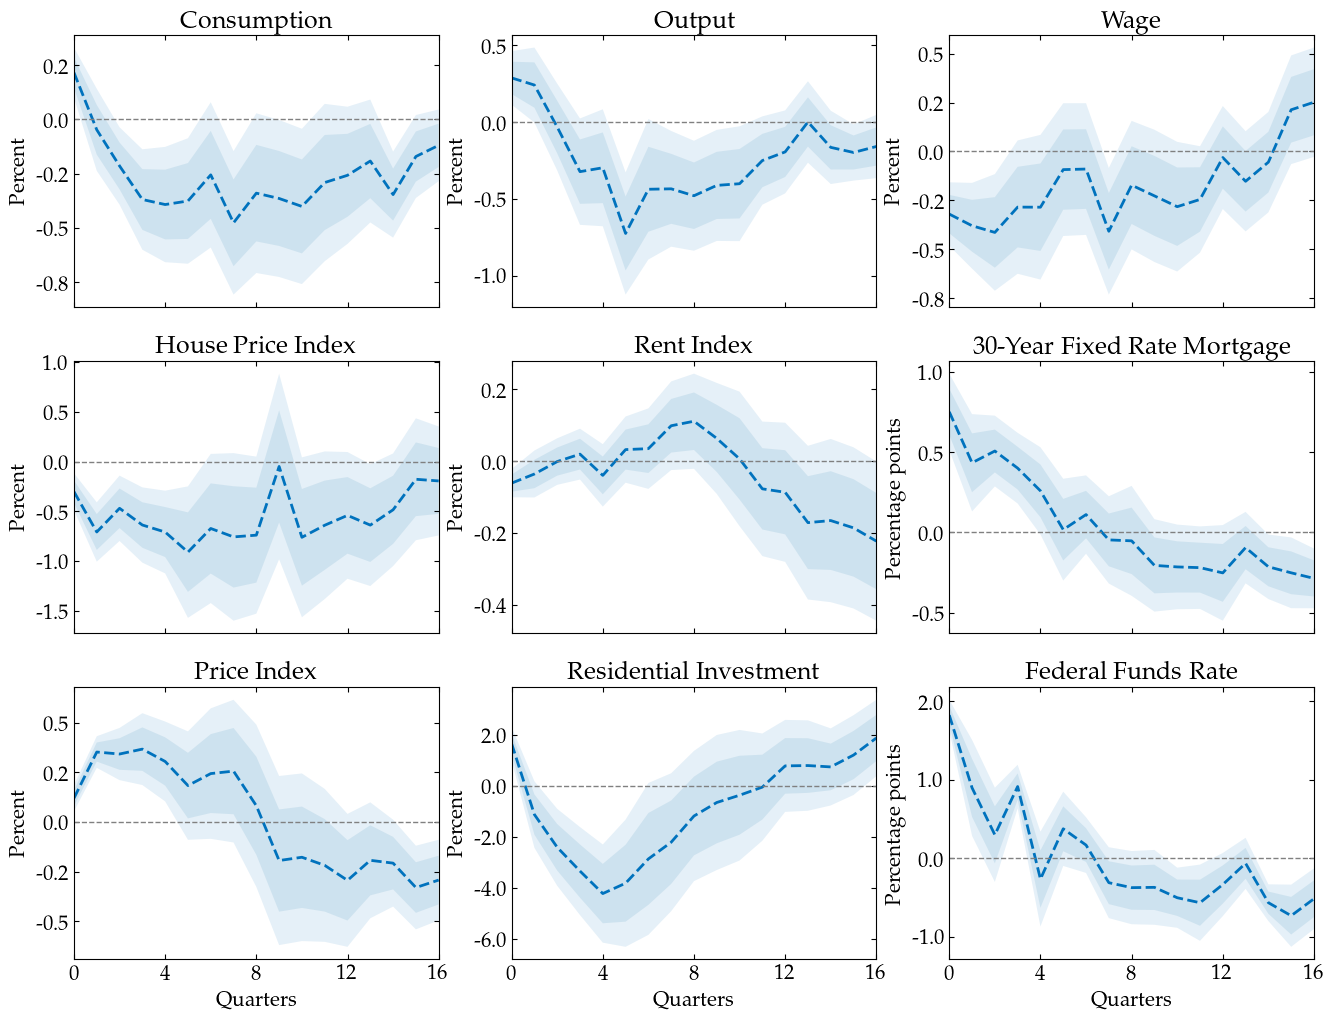

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(16,12), sharex=True)
ax = ax.flatten()

var_name = {'C_BHAT': 'Consumption', 'Y': 'Output', 'w': 'Wage',
            'qh': 'House Price Index', 'Rent': 'Rent Index','Mortgage': '30-Year Fixed Rate Mortgage',
            'pi': 'Price Index', 'Investment': 'Residential Investment', 'r': 'Federal Funds Rate'}

H = 17
interval = 2

# Function to format y-axis labels with the same number of digits
def format_func(value, tick_number):
    return f'{value:.1f}'  # Format with 2 decimal places

formatter = FuncFormatter(format_func)

for i, (key, value) in enumerate(var_name.items()):   
    ax[i].plot(100*df[key][:H], ls = '--', linewidth=2, label = 'Romer \& Romer')
    ax[i].fill_between(range(H), 100*df_bands[f"lb_{key}"][:H], 100*df_bands[f"ub_{key}"][:H], alpha = 0.1, edgecolor = None)
    ax[i].fill_between(range(H), 100*df_bands68[f"lb_{key}"][:H], 100*df_bands68[f"ub_{key}"][:H], 
                       alpha = 0.1, color = '#006BA2', edgecolor = None)
    
    plot_highfreq = False
    if plot_highfreq:
        ax[i].plot(100*df_JkPoorMan[key][:H], ls = 'dotted', linewidth=2, label = 'Jarocinski \& Karadi, Poor man')
        ax[i].plot(100*df_JkMedian[key][:H], linewidth=2, ls = 'dashdot', label = 'Jarocinski \& Karadi, Median')
        ax[i].plot(100*df_Mar[key][:H], linewidth=2, label = 'Miranda-Agrippino \& Ricco')
        if i == 6:
            ax[i].legend(fontsize=10, frameon=False)

    ax[i].set_title(var_name[key])
    ax[i].set_xticks(range(0, H + 1, interval))
    ax[i].set_xticklabels(range(0, H + 1, interval))
    ax[i].tick_params(direction='in', top=True, bottom=True, left=True, right=True)
    ax[i].set_xlim(0, 16)
    ax[i].axhline(y=0.0, color='grey', linestyle='--', linewidth=1.0)
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].xaxis.set_major_locator(MultipleLocator(4))
    if key == 'r' or key == 'Mortgage':
        ax[i].set_ylabel('Percentage points')
    else :
        ax[i].set_ylabel('Percent')

    if i == 6 or i == 7 or i == 8:
        ax[i].set_xlabel('Quarters')
plt.show()

save = False
if save:
    figure_path = "/Users/thoma/OneDrive/Skrivebord/KU/9. semester/Thesis/Code/Model/HANK/sequence-jacobian/figs"

    # Save the plot
    fig.savefig(os.path.join(figure_path, 'Main Empirical IRF_v3.pdf'), dpi=1000, bbox_inches='tight')

# Figure 2. State dependence of monetary policy

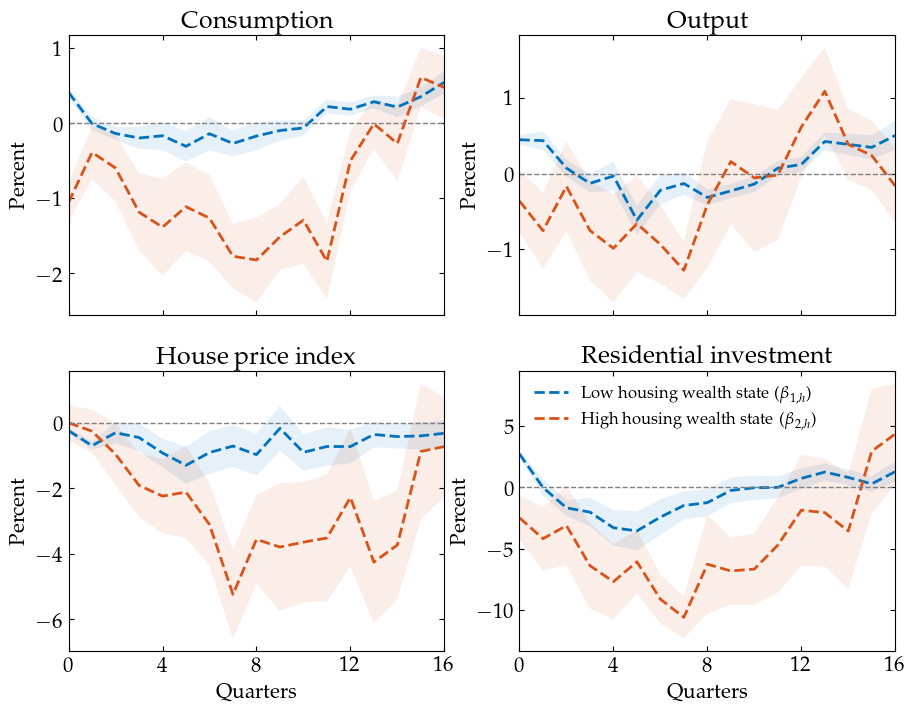

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16*2/3,12*2/3), sharex=True)
ax = ax.flatten()

var_name = {'C_BHAT': 'Consumption', 'Y': 'Output',
            'qh': 'House price index', 'Investment': 'Residential investment'}

H = 17
interval = 2

# Function to format y-axis labels with the same number of digits
def format_func(value, tick_number):
    return f'{value:.1f}'  # Format with 2 decimal places

formatter = FuncFormatter(format_func)

for i, (key, value) in enumerate(var_name.items()):   
    ax[i].plot(100*df_gam1[key][:H], ls = '--', label = r'Low housing wealth state ($\beta_{1,h}$)')
    ax[i].fill_between(range(H), 100*df_gam1_bands[f"lb_{key}"][:H], 100*df_gam1_bands[f"ub_{key}"][:H], alpha = 0.1, edgecolor = None)
    # ax[i].fill_between(range(H), 100*df_bands68[f"lb_{key}"][:H], 100*df_bands68[f"ub_{key}"][:H], 
    #                    alpha = 0.1, color = '#006BA2', edgecolor = None)

    ax[i].plot(100*df_gam2[key][:H], ls = '--', label = r'High housing wealth state ($\beta_{2,h}$)')
    ax[i].fill_between(range(H), 100*df_gam2_bands[f"lb_{key}"][:H], 
                        100*df_gam2_bands[f"ub_{key}"][:H], alpha = 0.1, edgecolor = None)

    ax[i].set_title(var_name[key])
    ax[i].set_xticks(range(0, H + 1, interval))
    ax[i].set_xticklabels(range(0, H + 1, interval))
    ax[i].tick_params(direction='in', top=True, bottom=True, left=True, right=True)
    ax[i].set_xlim(0, 16)
    ax[i].axhline(y=0.0, color='grey', linestyle='--', linewidth=1.0)
    # ax[i].yaxis.set_major_formatter(formatter)
    ax[i].xaxis.set_major_locator(MultipleLocator(4))
    if key == 'r' or key == 'Mortgage':
        ax[i].set_ylabel('Percentage points')
    else :
        ax[i].set_ylabel('Percent')

    if i == 2 or i == 3:
        ax[i].set_xlabel('Quarters')
    
    if i == 3:
        ax[i].legend(fontsize=12, frameon=False, loc = 'upper left')
    
plt.show()

save = False
if save:
    figure_path = "/Users/thoma/OneDrive/Skrivebord/KU/9. semester/Thesis/Code/Model/HANK/sequence-jacobian/figs"

    # Save the plot
    fig.savefig(os.path.join(figure_path, 'StateDependence.pdf'), dpi=1000, bbox_inches='tight')

In [29]:
# Define the path to the Excel file
subfolder = 'Misc'
filename = 'rrshockirfs_small_v1.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)

# Load the Excel file into a DataFrame
df_rr_small = pd.read_excel(file_path, sheet_name='gamma', header = None)

col_name = ['r', 'C_BHAT', 'qh', 'Y', 'Investment']
df_rr_small.columns = col_name

# col_name = ['r', 'C_BHAT', 'qh', 'Y', 'pi', 'N', 'Investment', 'w', 'Mortgage']
bounds_name = ['lb', 'ub']
col_name_bands = []
for i in bounds_name:
    for j in col_name:
        col_name_bands.append(f'{i}_{j}')
df_rr_small_bands = pd.read_excel(file_path, sheet_name='gammabands', header = None)
df_rr_small_bands.columns = col_name_bands

FileNotFoundError: [Errno 2] No such file or directory: 'Misc\\rrshockirfs_small_v1.xlsx'

# Appendix figures

In [14]:
# Define the path to the Excel file
subfolder = 'Misc'
filename = 'StateVariable.xlsx'  # Replace with your actual file name
file_path = os.path.join(subfolder, filename)

# Load the Excel file into a DataFrame
df_s = pd.read_excel(file_path, sheet_name='state', header = None)
df_Fs = pd.read_excel(file_path, sheet_name='stateProb', header = None)
date_range = pd.date_range(start='1975-01-01', end='2007-12-01', freq='QS')
df_s.index = date_range
df_Fs.index = date_range

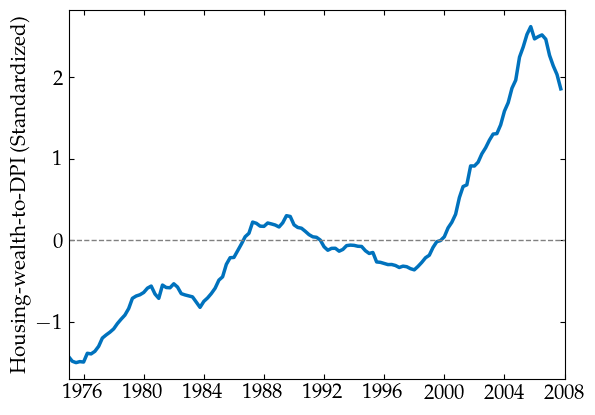

In [28]:
fig, ax = plt.subplots()

ax.plot(df_s, label = 'State variable')
# ax.set_title("Housing-wealth-to-DPI ratio")
ax.tick_params(direction='in', top=True, bottom=True, left=True, right=True)
ax.axhline(y=0.0, color='grey', linestyle='--', linewidth=1.0)
ax.set_xlim(pd.to_datetime('1975-01-01'), pd.to_datetime('2008-01-01'))
ax.set_ylabel('Housing-wealth-to-DPI (Standardized)')

save = True
if save:
    figure_path = "/Users/thoma/OneDrive/Skrivebord/KU/9. semester/Thesis/Code/Model/HANK/sequence-jacobian/figs"
    fig.savefig(os.path.join(figure_path, 'HousingToDpi.pdf'), dpi=1000, bbox_inches='tight')

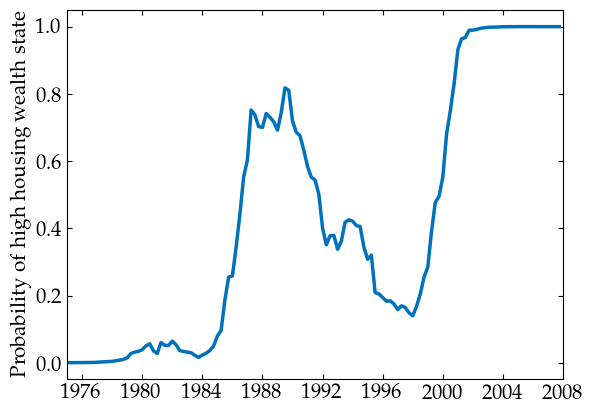

In [25]:
fig, ax = plt.subplots()

ax.plot(df_Fs, label = 'State variable')
# ax.set_title("Housing-wealth-to-DPI ratio")
ax.tick_params(direction='in', top=True, bottom=True, left=True, right=True)
# ax.axhline(y=0.0, color='grey', linestyle='--', linewidth=1.0)
ax.set_xlim(pd.to_datetime('1975-01-01'), pd.to_datetime('2008-01-01'))
ax.set_ylabel('Probability of high housing wealth state')

save = False
if save:
    figure_path = "/Users/thoma/OneDrive/Skrivebord/KU/9. semester/Thesis/Code/Model/HANK/sequence-jacobian/figs"
    fig.savefig(os.path.join(figure_path, 'Fs.pdf'), dpi=1000, bbox_inches='tight')